# Plant Seedling Classification using Convolutional Neural Networks
This dataset consists of a training set and a testing set of images of plant seedlings at various growth stages. Each image has its own unique ID. The dataset has 12 main plant species which we need to classify the testing set into. 
For this task we will need to process and clean the data using image processing Then we will have to build a model and evaluate it.
Let's get started! 

In [0]:
!pip install easycolab
import easycolab as ec
ec.mount()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Opening directory /content/gdrive/My Drive/
Done!


In [0]:
import tensorflow 

**(1). Importing all the necessary modules:**

In [0]:
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCfTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools

# KERAS AND SKLEARN MODULES
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

# GLOBAL VARIABLES
scale = 64
seed = 7

**(2). Getting the data and resizing the images:**

In [0]:
# path_to_images = '../input/plant-seedlings-classification/train/*/*.png'
# images = glob(path_to_images)
# trainingset = []
# traininglabels = []
# num = len(images)
# count = 1
# #READING IMAGES AND RESIZING THEM
# for i in images:
#     print(str(count)+'/'+str(num),end='\r')
#     trainingset.append(cv2.resize(cv2.imread(i),(scale,scale)))
#     traininglabels.append(i.split('/')[-2])
#     count=count+1
#     trainingset = np.asarray(trainingset)
#     traininglabels = pd.DataFrame(traininglabels)

In [0]:
# "/input/plant-seedlings-classification/train/Maize/a5c2eec2d.png".split('/')[-2]

'Maize'

In [0]:
cd plant seeding

/content/gdrive/My Drive/plant seeding


In [0]:
trainingset=np.load('images.npy')
traininglabels=np.load('classes.npy')
trainingset.shape,traininglabels.shape

((4750, 64, 64, 3), (4750,))

**(3). Cleaning the images and removing the background:**
* Cleaning of the images is an intensive task. We will have to:
    * Convert the RGB image into HSV.
    * We will have to blur the image to remove noise.
    * We will have to create a mask to remove the background.

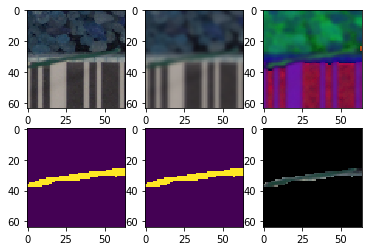

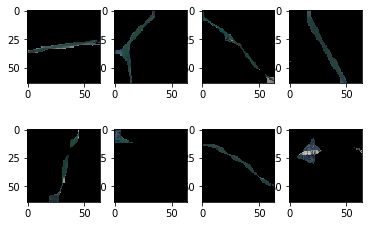

In [0]:
new_train = []
sets = []
getEx = True
for i in trainingset:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    #GREEN PARAMETERS
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    new_train.append(new)
    
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()
        getEx = False
new_train = np.asarray(new_train)

# CLEANED IMAGES
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(new_train[i])

**(4). Converting the Labels into numbers:**
* The labels are strings and these are hard to process. So we'll convert these labels into a binary classification.
* The classification can be represented by an array of 12 numbers which will follow the condition:
    * 0 if the species is not detected.
    * 1 if the species is detected.
* Example: If Blackgrass is detected, the array will be = [1,0,0,0,0,0,0,0,0,0,0,0]

In [0]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
classes = enc.fit_transform(traininglabels)
classes.shape,new_train.shape

((4750, 12), (4750, 64, 64, 3))

**(5). Defining our model and splitting the dataset:**
* We need to split the training set for validation.

In [0]:

x_train,x_test,y_train,y_test = train_test_split(new_train,classes,test_size=0.1,
                                                 stratify=traininglabels)

**(6). Preventing Overfitting:**
* To prevent overfitting, we need to create a function that can randomly change image characterisitics during fitting.

In [0]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4275, 64, 64, 3), (4275, 12), (475, 64, 64, 3), (475, 12))

**(7). Defining the Convolutional Neural Network:**
* This model has 4 convolution layers.
* This model has 3 fully connected layers.

In [0]:


model = Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape =([64,64,3])))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size= 5, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=5, activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size= 5, activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size= 5, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________

**(8). Fitting the CNN onto the data:**
* We have to set a few callbacks:
    * We have to reduce the learning rate because, convergence will be much quicker.
    * We have to save the best weights of the model.
    * We have to save the last weights of the model.    

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
path_model='plantxxx.h5'

checkpoint = ModelCheckpoint("plantxxx.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#MODEL
hist = model.fit(x_train,y_train, 
                            epochs=100, validation_data=(x_test,y_test), 
                           batch_size=128,callbacks=[
    ModelCheckpoint(filepath=path_model)
            ])



# print(model.evaluate(x_train, y_train))  # Evaluate on train set
# print(model.evaluate(x_test, y_test))  # Evaluate on test set

Train on 4275 samples, validate on 475 samples
Epoch 1/100
4275/4275 [==============================] - 9s 2ms/sample - loss: 3.0010 - acc: 0.1963 - val_loss: 47.2013 - val_acc: 0.1095
Epoch 2/100
4275/4275 [==============================] - 2s 492us/sample - loss: 2.2952 - acc: 0.3160 - val_loss: 12.8631 - val_acc: 0.1284
Epoch 3/100
4275/4275 [==============================] - 2s 490us/sample - loss: 1.9413 - acc: 0.3843 - val_loss: 3.1143 - val_acc: 0.2863
Epoch 4/100
4275/4275 [==============================] - 2s 489us/sample - loss: 1.7146 - acc: 0.4379 - val_loss: 4.2839 - val_acc: 0.2000
Epoch 5/100
4275/4275 [==============================] - 2s 490us/sample - loss: 1.5171 - acc: 0.4910 - val_loss: 2.5317 - val_acc: 0.3705
Epoch 6/100
4275/4275 [==============================] - 2s 495us/sample - loss: 1.3282 - acc: 0.5312 - val_loss: 1.5420 - val_acc: 0.5579
Epoch 7/100
4275/4275 [==============================] - 2s 531us/sample - loss: 1.2320 - acc: 0.5644 - val_loss: 1.312

In [0]:
print(model.evaluate(x_train, y_train))  # Evaluate on train set
print(model.evaluate(x_test, y_test))  # Evaluate on test set

4275/4275 [==============================] - 1s 255us/sample - loss: 0.0602 - acc: 0.9815
[0.060234311526608575, 0.9815205]
475/475 [==============================] - 0s 236us/sample - loss: 2.3672 - acc: 0.6063
[2.367249644931994, 0.6063158]


**(9). Confusion Matrix:**
* The confusion matrix is one of the best ways to analyse the errors in the model.
* It gives the exact number of correct and incorrect predictions

In [0]:
# loading the model 
from tensorflow.keras.models import load_model
models = load_model('/content/gdrive/My Drive/plant seeding/plantxxx.h5')

In [0]:
# creating the list of names of species
names_list = ['Common Chickweed','Fat Hen','Loose Silky-bent','Small-flowered Cranesbill','Shepherds Purse', 'Maize','Sugar beet','Common wheat','Cleavers','Black-grass',
'Charlock','Scentless Mayweed']
names_list = sorted(gag)# since it was sorted while data is taken


'Black-grass'

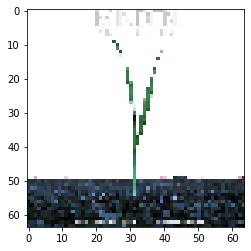

In [0]:
import cv2
img=cv2.imread('/content/gdrive/My Drive/plant seeding/common.jpg')
import matplotlib.pyplot as plt
img=cv2.resize(img,(64,64))
img = np.float32(img)/255.0
plt.imshow(img)
plt.show()

In [0]:
img_shape=np.expand_dims(img,axis=0)
img_shape=img_shape.reshape(-1,64,64,3)
img_shape.shape
result2 = models.predict(img_shape)
pred_ix2=np.argmax(result2)


names_list[pred_ix2]

'Common wheat'

In [0]:
# PREDICTIONS
y_pred = model.predict(x_test)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 

cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)

[[16  1  4  1  0  0  0  0  4  0  0  0]
 [ 1 22  0  4  0 12  0  0  0  0  0  0]
 [ 1  1 16  1  0  0  0  1  9  0  0  0]
 [ 0  3  1 36  3  3  0 10  1  0  1  3]
 [ 1  0  1  0  7  8  0  0  1  4  0  0]
 [ 0  7  0  0  3 31  0  0  1  4  0  1]
 [ 1  1  7  1  1  1 42  5  3  2  1  0]
 [ 0  0  0 12  0  0  5  4  0  0  1  0]
 [ 2  0 13  0  3  6  0  0 27  1  0  0]
 [ 0  0  0  0  6  6  0  0  0 10  1  0]
 [ 0  1  1  0  0  1  2  0  2  0 42  1]
 [ 0  0  1  1  1  0  0  0  1  0  0 35]]
